
<img src="../../images/brownbear.png" width="400">

## A financial tool that can analyze and maximize investment portfolios on a risk adjusted basis  


Description: This notebook is useful for examining potfolios comprised of stocks from the S&P 400.  Construct portfolios from the 400 stocks in the S&P 400 mid cap index and examine the results of different weighting schemes.


In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import brownbear as bb

# format price data
pd.options.display.float_format = '{:0.2f}'.format

# display all rows
pd.set_option('display.max_rows', None)

# do not truncate column names
pd.set_option('display.max_colwidth', None)

%matplotlib inline

In [3]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

### Some Globals

In [4]:
investment_universe = ['sp400-galaxy']
risk_free_rate = 0
annual_returns = '3 Yr'
vola = 'Vola'
ds_vola = 'DS Vola'

In [5]:
# Fetch Investment Options - all values annualized
df = bb.fetch(investment_universe, risk_free_rate, annual_returns, vola, ds_vola)
df

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
0,ACHC,Acadia Healthcare,US Stocks:Healthcare,269.46,152.54,75.76,12.72,-0.01,42.72,21.17,49.33,12.72,0.26
1,ACIW,ACI Worldwide,US Stocks:Technology,8.18,93.49,35.63,15.46,16.30,40.15,31.66,31.39,15.46,0.49
2,ATGE,Adtalem Global Education,US Stocks:Consumer Discretionary,-4.47,234.03,29.15,-6.35,17.15,36.00,20.50,38.91,-6.35,-247.08
3,ACM,AECOM,US Stocks:Industrials,417.38,51.49,25.55,16.35,16.19,34.73,14.15,36.41,16.35,0.45
4,AMG,Affiliated Managers Group,US Stocks:Financials,926.31,450.14,74.44,-9.70,2.08,72.51,20.14,38.42,-9.70,-372.67
5,ADS,Alliance Data Systems Corp,US Stocks:Technology,7300.98,175.89,11.73,-25.58,-13.55,61.85,23.66,67.57,-25.58,-1728.44
6,ACC,American Campus Communities,US Stocks:Real Estate,11.17,3.01,-4.40,7.85,2.77,24.63,12.58,31.04,7.85,0.25
7,AEO,American Eagle Outfitters,US Stocks:Consumer Discretionary,393.18,348.33,102.08,11.57,14.50,32.16,13.57,45.01,11.57,0.26
8,AFG,American Financial Group,US Stocks:Financials,3347.48,80.42,15.34,2.36,14.46,28.56,14.56,28.13,2.36,0.08
9,AGCO,AGCO,US Stocks:Industrials,1519.63,229.78,112.81,25.10,23.13,37.35,13.08,31.93,25.10,0.79


In [6]:
# Rank
rank = bb.rank(df, rank_by='Sharpe Ratio', group_by='Asset Subclass', num_per_group=1)
rank_filtered = rank
#rank_filtered = rank.loc[(rank['3 mo'] > 0) & rank['1 Yr'] > 0]
rank_filtered = rank_filtered.head(20)
rank_filtered

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
253,PNM,PNM Resources,US Stocks:Utilities,-3.30,-6.09,-0.41,12.66,10.48,4.34,2.58,24.62,12.66,0.51
286,SEDG,SolarEdge,US Stocks:Technology,69.26,51.31,136.85,80.29,63.94,67.25,49.41,52.56,80.29,1.53
187,LSI,Life Storage Inc,US Stocks:Real Estate,30.49,93.06,16.90,21.40,7.40,20.09,10.64,17.20,21.40,1.24
296,SMG,Scotts Miracle-Gro Company,US Stocks:Materials,-30.51,150.20,100.85,36.58,28.98,32.79,19.25,35.91,36.58,1.02
123,GNRC,Generac Holdings Inc.,US Stocks:Industrials,2816.08,464.13,212.02,92.50,57.39,69.72,27.48,34.80,92.50,2.66
267,RGEN,Repligen,US Stocks:Healthcare,351.15,97.55,146.68,81.18,52.47,37.30,18.14,34.56,81.18,2.35
30,BRO,Brown & Brown,US Stocks:Financials,66.70,-3.84,5.17,20.94,24.75,26.71,12.27,20.72,20.94,1.01
155,INT,World Fuel Services Corp,US Stocks:Energy,-42.14,-1.25,6.90,11.32,-6.70,57.58,40.85,46.28,11.32,0.24
278,SAM,Boston Beer Company,US Stocks:Consumer Staples,319.71,75.10,166.18,82.48,39.91,65.96,37.60,46.47,82.48,1.77
81,DECK,Deckers Outdoor Corporation,US Stocks:Consumer Discretionary,561.32,149.44,87.51,50.27,42.26,28.24,13.89,31.80,50.27,1.58


### Sample Portfolios
Format 'Investment option': weight

In [7]:
# everything ranked
ranked_portfolio = {
    'Title': 'Ranked Portfolio'
}
everything = list(rank_filtered['Investment Option'])
ranked_portfolio.update(dict.fromkeys(everything, 1/len(everything)))

# top 10
top10_portfolio = {
    'Title': 'Ranked Portfolio'
}
top10 = list(rank_filtered['Investment Option'])[:10]
top10_portfolio.update(dict.fromkeys(top10, 1/len(top10)))

### Custom Portfolios

In [8]:
# My portfolio
my_portfolio = {
    'Title': 'My Portfolio',

}

### Choose Portfolio Option

In [9]:
# Select one of the portfolios from above
portfolio_option = ranked_portfolio

In [10]:
# Make a copy so that the original portfolio is preserved
portfolio_option = portfolio_option.copy()

### Analysis Options

In [11]:
# Specify the weighting scheme.  It will replace the weights specified in the portfolio
# You can also fix the weights on some Investent Options, Asset Classes, and Asset Subclasses
# while the others are automatically calculated.

# 'Equal' - will use equal weights.

# 'Sharpe Ratio' - will use proportionally weighted # allocations based on the percent
#  of an investment option's sharpe ratio to the sum of all the sharpe ratios in the portfolio.

# 'Std Dev' - will use standard deviation adjusted weights

# 'Annual Returns' - will use return adjusted weights

# 'Vola' - will use volatility adjusted weights

# 'DS Vola' - will use downside volatility adjusted weights

# None: 'Investment Option' means use user specified weights
#       'Asset Class' means do not group by Asset Class
#       'Asset Subclass means do not group by Asset Subclass 

weight_by = {
    'Asset Class':       {'weight_by': None},
    'Asset Subclass':    {'weight_by': None},
    'Investment Option': {'weight_by': 'DS Vola'},
}
#weight_by = None

In [12]:
bb.DEBUG = False

# Analyze portfolio
annual_ret, std_dev, sharpe_ratio = \
    bb.analyze(df, portfolio_option, weight_by)

,PNM,SEDG,LSI,SMG,GNRC,RGEN,BRO,INT,SAM,DECK,CABO,Ranked Portfolio
Annual Returns,12.66,80.29,21.40,36.58,92.50,81.18,20.94,11.32,82.48,50.27,40.81,31.41
Std Dev,24.62,52.56,17.20,35.91,34.80,34.56,20.72,46.28,46.47,31.80,25.82,25.30
Sharpe Ratio,0.51,1.53,1.24,1.02,2.66,2.35,1.01,0.24,1.77,1.58,1.58,1.24
Weight,0.42,0.02,0.10,0.06,0.04,0.06,0.09,0.03,0.03,0.08,0.07,1.00
Worst Typical Down Year,-36.58,-24.83,-13.00,-35.24,22.90,12.06,-20.50,-81.24,-10.46,-13.33,-10.83,-19.20
Black Swan,-61.20,-77.39,-30.20,-71.15,-11.90,-22.50,-41.22,-127.52,-56.93,-45.13,-36.65,-44.50


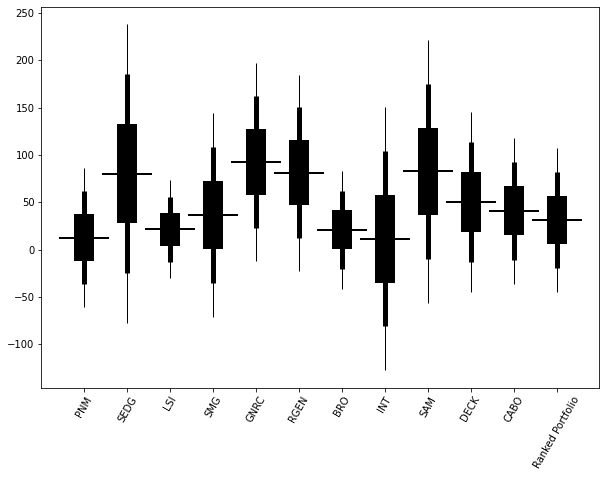

In [13]:
# Display Results
summary = bb.summary(df, portfolio_option, annual_ret, std_dev, sharpe_ratio)
summary

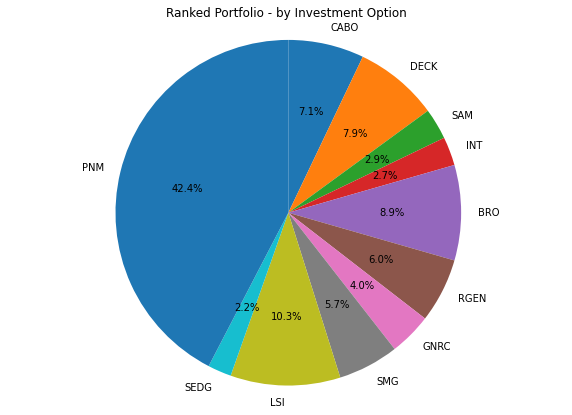

CABO   0.07
DECK   0.08
SAM    0.03
INT    0.03
BRO    0.09
RGEN   0.06
GNRC   0.04
SMG    0.06
LSI    0.10
SEDG   0.02
PNM    0.42



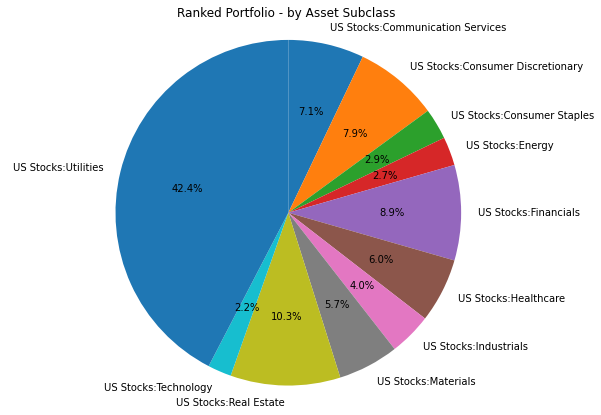

US Stocks:Communication Services   0.07
US Stocks:Consumer Discretionary   0.08
US Stocks:Consumer Staples         0.03
US Stocks:Energy                   0.03
US Stocks:Financials               0.09
US Stocks:Healthcare               0.06
US Stocks:Industrials              0.04
US Stocks:Materials                0.06
US Stocks:Real Estate              0.10
US Stocks:Technology               0.02
US Stocks:Utilities                0.42



In [14]:
# Show pie charts of investment and asset class weights
bb.show_pie_charts(df, portfolio_option, charts=['Investment Option', 'Asset Subclass'])

In [15]:
# Show exact weights
bb.print_portfolio(portfolio_option)

Ranked Portfolio Weights:
    PNM                            0.4237
    SEDG                           0.0221
    LSI                            0.1027
    SMG                            0.0568
    GNRC                           0.0398
    RGEN                           0.0603
    BRO                            0.0891
    INT                            0.0268
    SAM                            0.0291
    DECK                           0.0787
    CABO                           0.0709


### Optimize Portfolio

In [16]:
# Run_portfolio_optimizer = True will run portfolio optimizer after portfolio analysis is complete
run_portfolio_optimizer = True

In [17]:
# Optimize sharpe ratio while specifying Annual Rate, Worst Typical Down Year,
# and Black Swan.  Setting a constraint to None optimizes absolute Sharpe Ratio
# without regard to that constraint.

'''
constraints = {
    'Annual Return': 12,
    'Worst Typical Down Year': -5,
    'Black Swan': None
}
'''

constraints = {
    'Annual Return': 8,
    'Worst Typical Down Year': None,
    'Black Swan': -40
}

if run_portfolio_optimizer:
    bb.optimizer(df, portfolio_option, constraints)

Running optimizer.........

Ranked Portfolio Metrics:           
    max_sharpe_ratio            2.14
    annual_return              62.92
    std_dev                    29.37
    worst typical down year     4.18
    black_swan                -25.19


Ranked Portfolio Weights:
    PNM                            0.0600
    SEDG                           0.0300
    LSI                            0.1700
    SMG                            0.0000
    GNRC                           0.2800
    RGEN                           0.2600
    BRO                            0.0400
    INT                            0.0400
    SAM                            0.0700
    DECK                           0.0000
    CABO                           0.0500



### Use Sharpe Ratio adjusted weights
Recommend that you also try using Sharpe Ratio adjusted weights and compare those results with the Optimized Portflio.  
It tends to produce a higher Annual Return while keeping the allocations more balanced than the Optimizer.  (See 'Analysis Options' section).